In [1]:
import numpy as np
import scipy.special
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.special import lambertw
from IPython.display import display, Image

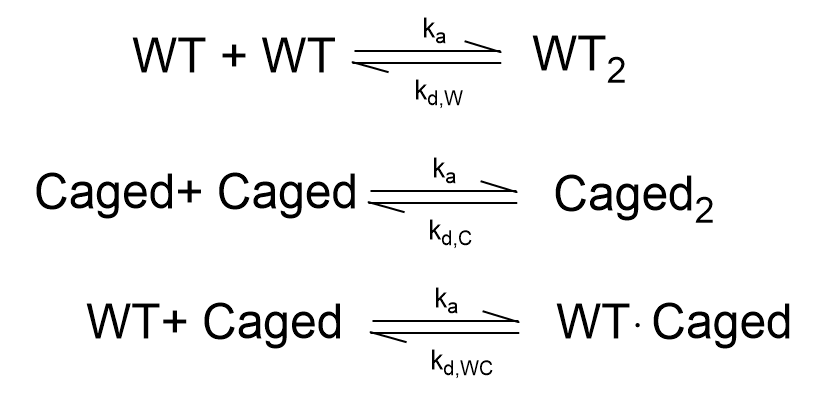

In [5]:
#Equillibrium equations that were used

display(Image(filename='Dimer_rxns.PNG'))

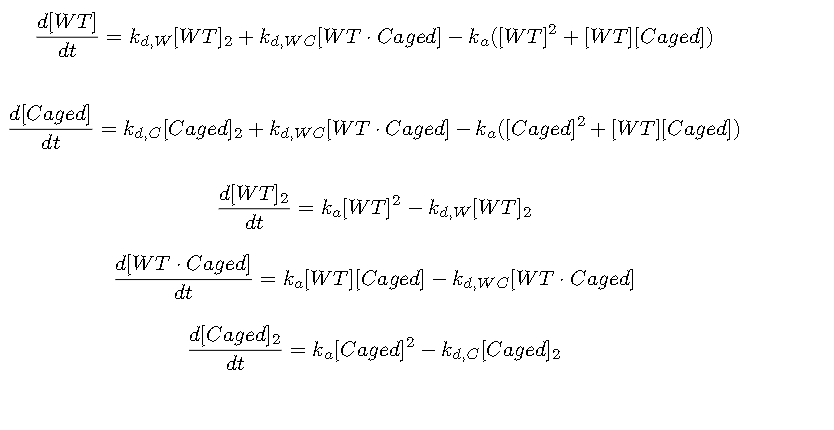

In [41]:
#Differential equations used

display(Image(filename='Differential_Eqns.PNG'))

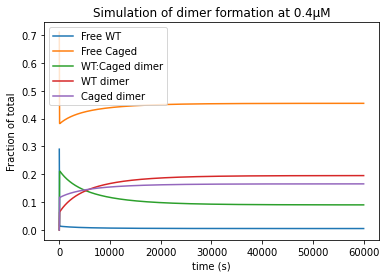

Percent in WT dimer: 19.51%


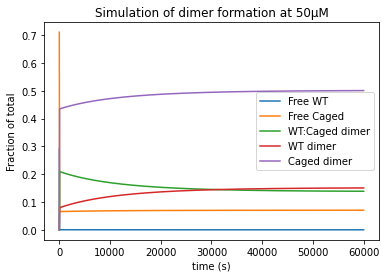

Percent in WT dimer: 15.08%


In [54]:
HIVPR_total_conc=0.4 #uM
HIVPR_1_total=0.71*HIVPR_total_conc
HIVPR_WT_total=0.29*HIVPR_total_conc
Kd_W=.0001 #Assumed K_d for the WT complex in uM, modeled at 100pM for simplicity
Kd_WC=.01  #Assumed K_d for the WT-Caged complex in uM, modeled as exactly halfway between the WT complex and Caged complex
Kd_C=1     #Assumed K_d for the Caged complex in uM, modeled at 1uM as what the dimer K_d is reported for D25N
ka=0.4 #uM-1, s-1

#Solve for dissociation constants
kd_W=Kd_W*ka
kd_WC=Kd_WC*ka
kd_C=Kd_C*ka

def Dimer_ODEs (Y, t, ka, kd_W, kd_WC, kd_C, W0, C0):
    """
    Y =[W, C, WC, W2, C2] where WC is the WT-caged complex, W2 is the WT complex, C2 is the caged complexes
    Assumed the following mass conservation conditions: 
        W0=W+WC+2*W2
        C0=C+WC+2*C2
        **Where WC has one monomer of W and one of C while W2 and C2 have two each
    
    """
    W, C, WC, W2, C2=Y
    W2_mc=(W0-W-WC)/2
    C2_mc=(C0-C-WC)/2
    dWdt=kd_W*(W2_mc)+kd_WC*WC-ka*(W**2+W*C)
    dCdt=kd_WC*WC+kd_C*(C2_mc)-ka*(C**2+W*C)
    dW2dt=ka*W**2-kd_W*(W2_mc)
    dWCdt=ka*W*C-kd_WC*WC
    dC2dt=ka*C**2-kd_C*(C2_mc)
    dydt=[dWdt, dCdt, dWCdt, dW2dt, dC2dt]
    return dydt
    
#initial conditions
Y0=[HIVPR_WT_total, HIVPR_1_total, 0, 0, 0]
W0=HIVPR_WT_total
C0=HIVPR_1_total

#Define the timepoints
t=np.linspace(0,60000, 1000) #Empirically how long it took to reach steady-state

#Integrate
Y1=odeint(Dimer_ODEs, Y0, t, args=(ka, kd_W, kd_WC, kd_C, W0, C0))

#Plot Y(t)
plt.figure(0)
plt.plot(t, Y1[:, 0]/HIVPR_total_conc, label='Free WT')
plt.plot(t, Y1[:, 1]/HIVPR_total_conc, label='Free Caged')
plt.plot(t, Y1[:, 2]/HIVPR_total_conc, label='WT:Caged dimer')
plt.plot(t, Y1[:, 3]/HIVPR_total_conc, label='WT dimer')
plt.plot(t, Y1[:, 4]/HIVPR_total_conc, label='Caged dimer')
plt.title('Simulation of dimer formation at 0.4\u03BCM')
plt.xlabel('time (s)')
plt.ylabel('Fraction of total')
plt.savefig("HIVPR_dimer_sim_400nM.pdf", format="pdf", bbox_inches="tight")
plt.legend()
plt.show()

#Print fraction in WT dimer
#print(Y1[-1, :]/.4)
#print(sum(Y1[-1, :]))
#print(Y1[-1, 0]+Y1[-1, 2]+Y1[-1, 3])
#print(Y1[-1, 1]+Y1[-1, 2]+Y1[-1, 4])
val='%.2f'%((Y1[-1, 3]/HIVPR_total_conc*100))
print("Percent in WT dimer: "+str(val)+"%")



#Let's look at the caging reaction concentration
HIVPR_total_conc=50 #uM
HIVPR_1_total=0.71*HIVPR_total_conc
HIVPR_WT_total=0.29*HIVPR_total_conc

#initial conditions
Y0=[HIVPR_WT_total, HIVPR_1_total, 0, 0, 0]
W0=HIVPR_WT_total
C0=HIVPR_1_total

Y2=odeint(Dimer_ODEs, Y0, t, args=(ka, kd_W, kd_WC, kd_C, W0, C0))

#Plot Y(t)
plt.figure(0)
plt.plot(t, Y2[:, 0]/HIVPR_total_conc, label='Free WT')
plt.plot(t, Y2[:, 1]/HIVPR_total_conc, label='Free Caged')
plt.plot(t, Y2[:, 2]/HIVPR_total_conc, label='WT:Caged dimer')
plt.plot(t, Y2[:, 3]/HIVPR_total_conc, label='WT dimer') 
plt.plot(t, Y2[:, 4]/HIVPR_total_conc, label='Caged dimer') 
plt.title('Simulation of dimer formation at 50\u03BCM')
plt.xlabel('time (s)')
plt.ylabel('Fraction of total')
plt.legend()
plt.savefig("HIVPR_dimer_sim_50uM.pdf", format="pdf", bbox_inches="tight")
plt.show()

#Print fraction in WT dimer
val='%.2f'%((Y2[-1, 3]/HIVPR_total_conc*100))
print("Percent in WT dimer: "+str(val)+"%")
